## Credit Approval Dataset
Data Set Information:

This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.

This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

# Goal
- Building Machine Learning Model to classifity target + or - 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data',names = ['A' + str(i) for i in range(1,17)])

In [3]:
df = df.rename(columns={"A16":'target'})

# 1.) Data Preparation and Exploratory Data Analysis
 - ### 1.1 shape
 - ### 1.2 missing values
 - ### 1.3 imputation if needed
 - ### 1.4 Imbalanced Classification?
 - ### 1.5 Split data for test set before EDA to make it like real world situation
 - ### 1.6 relationship among features
 - ### 1.7 Features Selection
 ___

- ## 1.1 data shape

In [4]:
print(df.shape)

(690, 16)


In [5]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  target  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


- ## 1.2 Missing Values

In [7]:
df.isnull().sum()

A1        0
A2        0
A3        0
A4        0
A5        0
A6        0
A7        0
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14       0
A15       0
target    0
dtype: int64

In [8]:
for col in df.columns:
    print(df[col].unique())

['b' 'a' '?']
['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58'
 '33.58' '18.83' '26.92' '31.25' '56.50' 

- It seems that the data contains missing values in '?' format.

In [9]:
# count ? in each columns
cols = df.columns
for i,col in enumerate(cols):
    idx = df[df[col]=='?'].index
    print('A'+str(i+1),':',len(idx))

A1 : 12
A2 : 12
A3 : 0
A4 : 6
A5 : 6
A6 : 9
A7 : 9
A8 : 0
A9 : 0
A10 : 0
A11 : 0
A12 : 0
A13 : 0
A14 : 13
A15 : 0
A16 : 0


- There are 37 rows containing missing values. This is around 4% of total number of observations in data.
- Hence I decided to drop those rows in categorical data columns(A1,A4,A5,A6,A7,A14). Because we cannot do data imputation
- For numerical columns, I will impute missing data with median because data in such columns has skewness

In [10]:
col_drop = ['A1','A4','A5','A6','A7','A14']
col_drop

['A1', 'A4', 'A5', 'A6', 'A7', 'A14']

In [11]:
for col in col_drop:
    idx = df[df[col]=='?'].index
    df = df.drop(index=idx)

In [12]:
# recheck '?'
cols = df.columns
for i,col in enumerate(cols):
    idx = df[df[col]=='?'].index
    print('A'+str(i+1),':',len(idx))

A1 : 0
A2 : 11
A3 : 0
A4 : 0
A5 : 0
A6 : 0
A7 : 0
A8 : 0
A9 : 0
A10 : 0
A11 : 0
A12 : 0
A13 : 0
A14 : 0
A15 : 0
A16 : 0


 - ## 1.3 Imputation if needed
     - A2 is numerical data

In [13]:
df['A2'].replace('?',np.nan,inplace=True)
df['A2'] = pd.to_numeric(df['A2'])

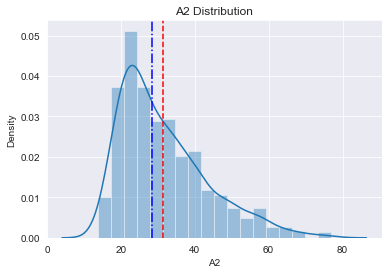

In [14]:
plt.figure()
sns.set_style('darkgrid')
sns.distplot(df['A2'],kde=True)
plt.title('A2 Distribution')
plt.axvline(df['A2'].mean(),linestyle='--',c='r') # mean, red line
plt.axvline(df['A2'].median(),linestyle='-.',c='b') # median,blue line
plt.show()

- impute missing values in A2 column with median

In [15]:
df['A2'] = df['A2'].replace(np.nan,df['A2'].median())
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [16]:
df.isnull().sum()

A1        0
A2        0
A3        0
A4        0
A5        0
A6        0
A7        0
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14       0
A15       0
target    0
dtype: int64

In [17]:
col_numeric = ['A2','A3','A8','A11','A14','A15']
for col in col_numeric:
    df[col] = pd.to_numeric(df[col])

In [18]:
df['target'].replace('+','approve',inplace=True)
df['target'].replace('-','not approve',inplace=True)

# 1.4 Imbalanced Classification?

In [19]:
print(df['target'].value_counts())
print('-------------')
print(df['target'].value_counts()/len(df['target']))

not approve    366
approve        298
Name: target, dtype: int64
-------------
not approve    0.551205
approve        0.448795
Name: target, dtype: float64


It seems that there is no imbalanced classification problem since positive target and negative target are almost equal

# 1.5 Split data for test set before EDA to make it like real world situation
- 20% for test set
- Total observation = 664
- 20% of total observation(roughly 134 data points ~50-50% approve and not approve) are randomly selected to be test set
- 80% of total observation(roughly 530) are randomly selected to be training set
- I decided to split test set before doing EDA and training model to make it like real-world situation
- Note that when doing sampling, the appropriate proportion of numbers of approve and not approve should be acquired

In [20]:
np.random.seed(1001)
idx_Approve_test = df[df['target']=='approve'].sample(67).index
idx_notApprove_test = df[df['target']=='not approve'].sample(67).index 
idx_test = list(idx_Approve_test) + list(idx_notApprove_test)
idx_train = [i for i in df.index if i not in idx_test]


test_data = df.loc[idx_test,:]
train_data = df.loc[idx_train,:]

test_data.to_csv('test_data_creditApproval.csv',index=False)
train_data.to_csv('train_data_creditApproval.csv',index=False)

# 1.6 EDA relationship between features and target

In [21]:
df = train_data
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43,560,approve
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280,824,approve
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120,0,approve
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360,0,approve
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164,31285,approve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,b,36.42,0.750,y,p,d,v,0.585,f,f,0,f,g,240,3,not approve
685,b,21.08,10.085,y,p,e,h,1.250,f,f,0,f,g,260,0,not approve
686,a,22.67,0.750,u,g,c,v,2.000,f,t,2,t,g,200,394,not approve
687,a,25.25,13.500,y,p,ff,ff,2.000,f,t,1,t,g,200,1,not approve


### 1.6.1 Analyze numerical data [A2,A3,A8,A11,A14,A15]

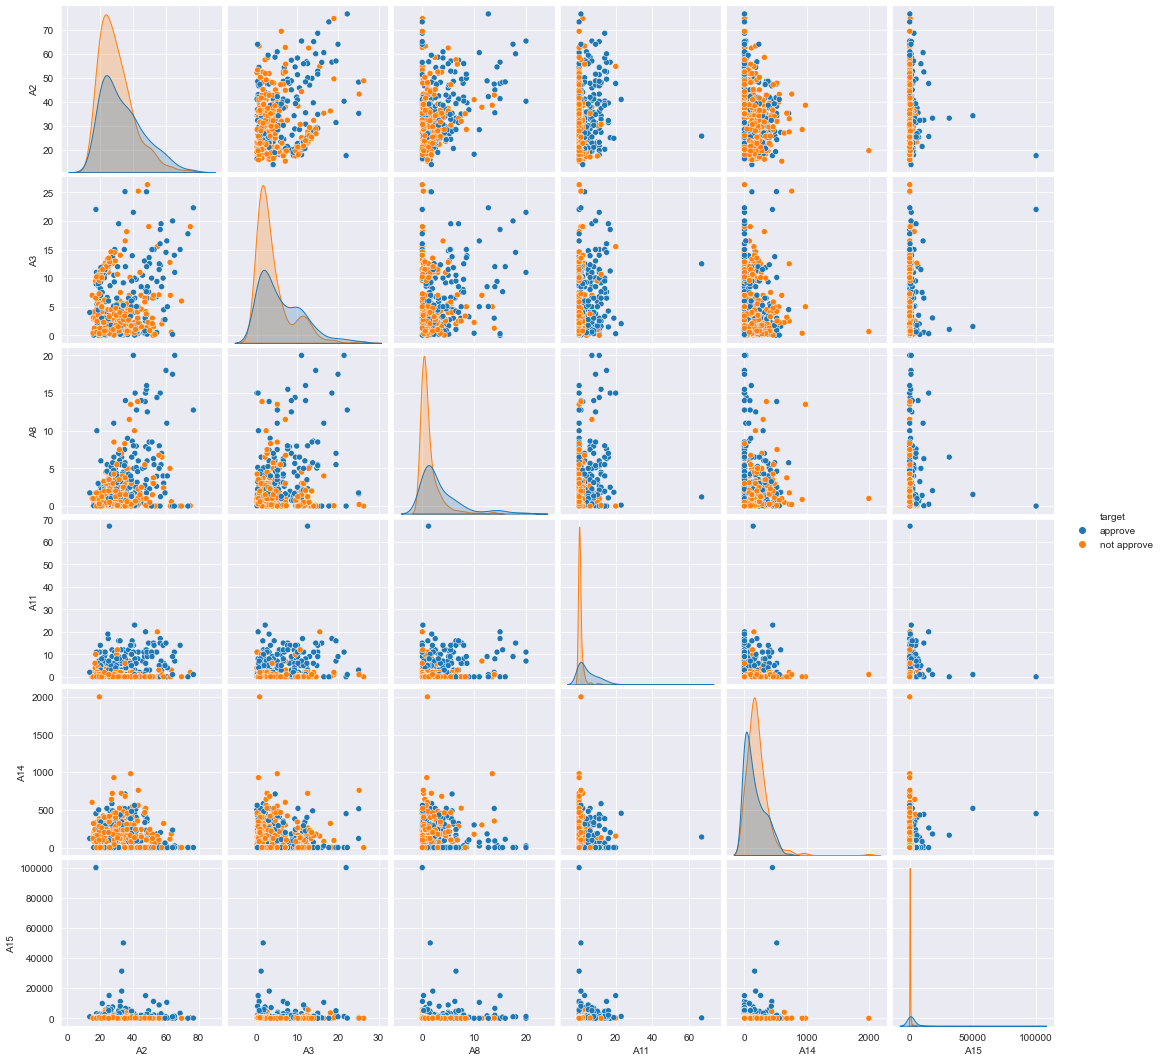

In [22]:
sns.pairplot(df,hue='target')
plt.grid(True)
plt.show()

In [23]:
df.groupby('target').mean()

,A2,A3,A8,A11,A14,A15
target,,,,,,
approve,33.766926,5.961429,3.446537,4.805195,159.168831,2074.952381
not approve,29.801839,3.953043,1.224632,0.625418,201.327759,194.688963


- In feature A8, A11, A15 mean of two groub are very different
- use t-test to determine if their mean are different (Statistically significant)
    - Null Hypothesis(H0), mean between two group are the same (mu1 = mu2)
    - Alternative Hypothesis, mean between two group are diffrent -> reject H0

In [24]:
# A8
from scipy import stats
A2_pos = df[df['target']=='approve']['A2'].values
A2_neg = df[df['target']=='not approve']['A2'].values

A3_pos =  df[df['target']=='approve']['A3'].values
A3_neg =  df[df['target']=='not approve']['A3'].values

A8_pos = df[df['target']=='approve']['A8'].values
A8_neg = df[df['target']=='not approve']['A8'].values

A11_pos = df[df['target']=='approve']['A11'].values
A11_neg = df[df['target']=='not approve']['A11'].values

A14_pos = df[df['target']=='approve']['A14'].values
A14_neg = df[df['target']=='not approve']['A14'].values

A15_pos = df[df['target']=='approve']['A15'].values
A15_neg = df[df['target']=='not approve']['A15'].values

# stat, p = ttest_ind()
def t_test(arr1,arr2,alpha=0.01):
    stat,p = stats.ttest_ind(arr1,arr2)
    if p < alpha:
        return print('p-value: ',p,'\n since p-value is less than alpha ({}). There is enough evidence to believe that mean of these two groups are different, reject Null hypothesis'.format(alpha))
    else:
        return print('p-value: ',p,'\n Mean of these two group are the same, fail to reject H0')
    

In [25]:
print('t-test to check if mean of pos and neg in each columns are different')
print('A2')
print(t_test(A2_pos,A2_neg))
print('______________________')

print('A3')
print(t_test(A3_pos,A3_neg))
print('______________________')

print('A8')
print(t_test(A8_pos,A8_neg))
print('______________________')

print('A11')
print(t_test(A11_pos,A11_neg))
print('______________________')

print('A14')
print(t_test(A14_pos,A14_neg))
print('______________________')

print('A15')
print(t_test(A15_pos,A15_neg))

t-test to check if mean of pos and neg in each columns are different
A2
p-value:  0.00011294799758773064 
 since p-value is less than alpha (0.01). There is enough evidence to believe that mean of these two groups are different, reject Null hypothesis
None
______________________
A3
p-value:  4.027756862769439e-06 
 since p-value is less than alpha (0.01). There is enough evidence to believe that mean of these two groups are different, reject Null hypothesis
None
______________________
A8
p-value:  1.6787250080693443e-15 
 since p-value is less than alpha (0.01). There is enough evidence to believe that mean of these two groups are different, reject Null hypothesis
None
______________________
A11
p-value:  1.4778449828299957e-23 
 since p-value is less than alpha (0.01). There is enough evidence to believe that mean of these two groups are different, reject Null hypothesis
None
______________________
A14
p-value:  0.006424527957184985 
 since p-value is less than alpha (0.01). There is 

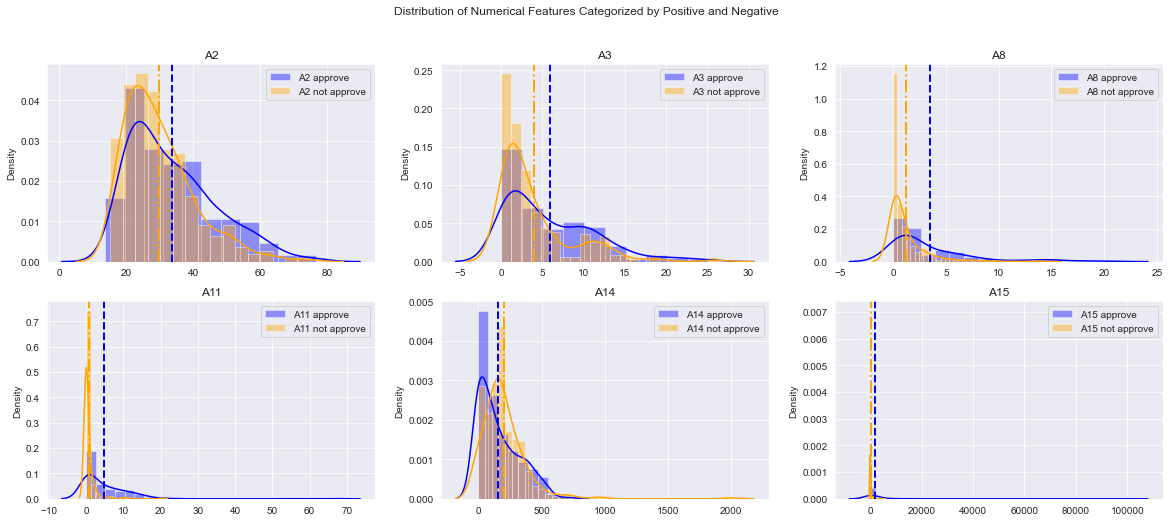

In [26]:
data = [(A2_pos,A2_neg),
        (A3_pos,A3_neg),
        (A8_pos,A8_neg),
        (A11_pos,A11_neg),
        (A14_pos,A14_neg),
        (A15_pos,A15_neg)]
features_num = ['A2','A3','A8','A11','A14','A15']

fig, axes= plt.subplots(2,3,figsize=(20,8))
i = 0
fig.suptitle('Distribution of Numerical Features Categorized by Positive and Negative')
for row in range(2):
    for col in range(3):
        ax = sns.distplot(data[i][0],label=features_num[i]+' approve',color='b',ax = axes[row,col])
        ax = sns.distplot(data[i][1],label=features_num[i]+' not approve',color='orange',ax = axes[row,col])
        ax.set_title(features_num[i])
        ax.axvline(np.mean(data[i][0]),linestyle='dashed',linewidth=2,color='b')
        ax.axvline(np.mean(data[i][1]),linestyle='-.',linewidth=2,color='orange')
        ax.legend()
        i += 1


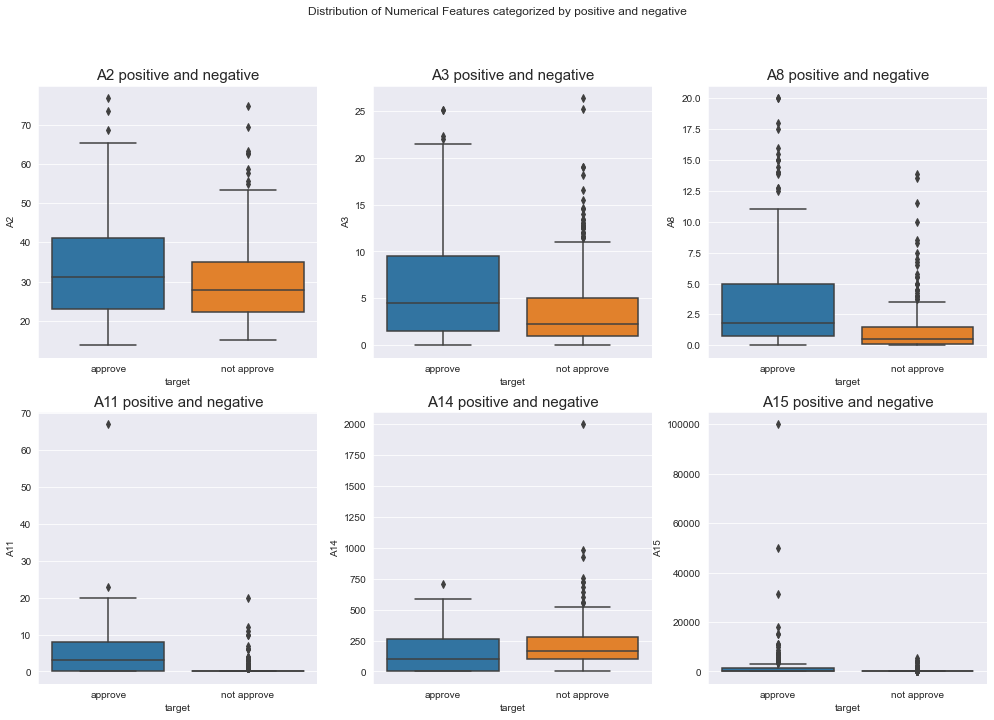

In [27]:
fig, axes = plt.subplots(2, 3,figsize=(17,11))
fig.suptitle('Distribution of Numerical Features categorized by positive and negative')
i = 0
for row in range(2):
    for col in range(3):
        ax1 = sns.boxplot(x='target',y=features_num[i],data=df,ax=axes[row,col])
        ax1.set_title('{} positive and negative'.format(features_num[i]),fontsize=15)
        i += 1
plt.show()

- Therefore, A2,A3,A8 A11 and A15 are good features to classify positive and negative
- A14 is not selected because the distribution of both "approve" and "not approve" are very similar

In [28]:
Selected_numerical_features = ['A2','A3','A8','A11','A15']

### 1.6.2 Analyze Categorical data [A2,A3,A8,A11,A14,A15]

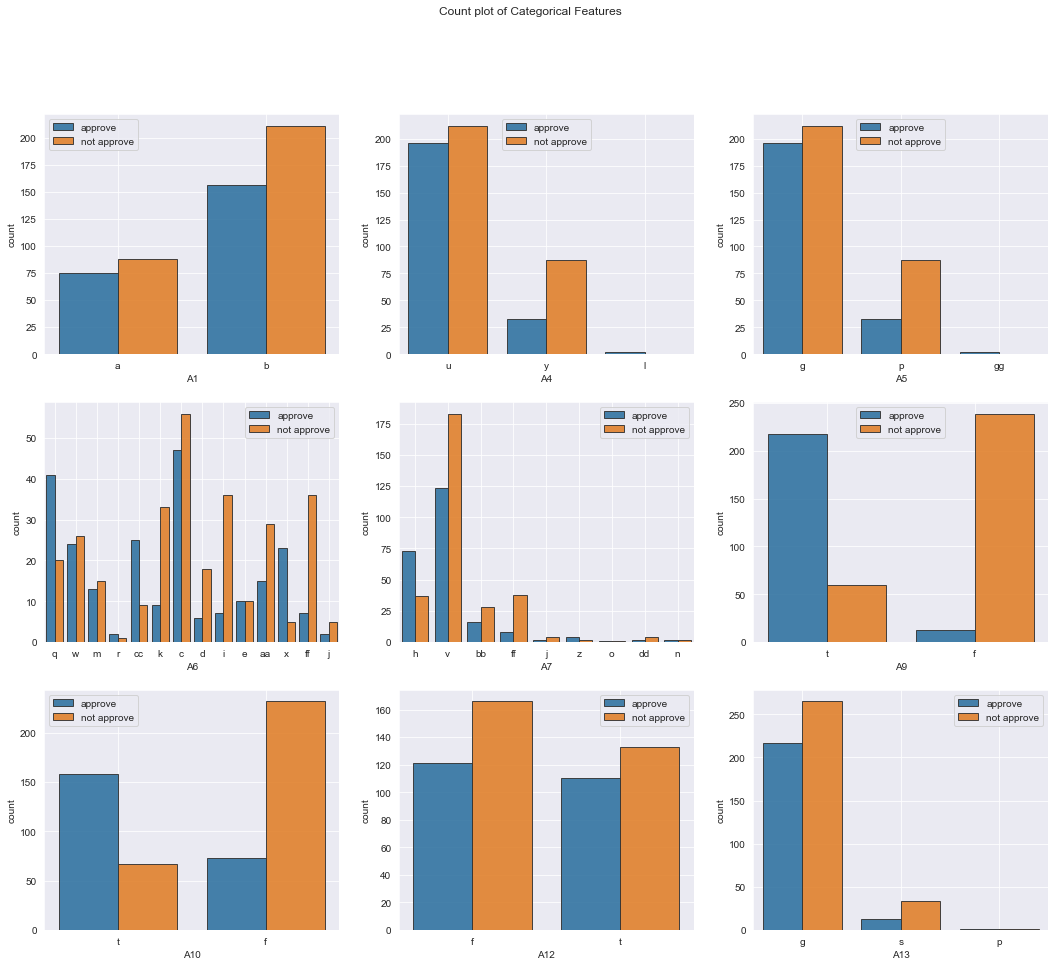

In [29]:
features_cat = ['A1','A4','A5','A6','A7','A9','A10','A12','A13']
fig,axes = plt.subplots(nrows=3,ncols=3,figsize = (18,15))
fig.suptitle('Count plot of Categorical Features')
i = 0
for row in range(3):
    for col in range(3):
        ax = sns.countplot(x=features_cat[i],hue='target',data=df,edgecolor='0.2',alpha=0.9,ax=axes[row,col])
        ax.grid(True)
        ax.legend(loc='best')
        i +=1
plt.show()

- Good features for classifying positive and negative: A6,A7,A9, A10
- A4 and A5 seems to have the same pattern (My guess though)

### 1.7 Features Selection

In [30]:
Selected_numerical_features = ['A2','A3','A8','A11','A15']
Selected_categorical_features = ['A4','A5','A6','A7','A9','A10']
target=['target']
features_selected = target+Selected_numerical_features + Selected_categorical_features

## 2. Model Building
- SVC
- Logistic Regression
- KneighborsClassifier

In [31]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, roc_auc_score
from sklearn.metrics import make_scorer,precision_score,f1_score

# 2.1 SVC MODEL

### 2.11 Import train data and Select Features

In [32]:
df = pd.read_csv('train_data_creditApproval.csv')
df = df[features_selected]
y = df['target']
X = df.drop('target',axis=1)
df

,target,A2,A3,A8,A11,A15,A4,A5,A6,A7,A9,A10
0,approve,58.67,4.460,3.040,6,560,u,g,q,h,t,t
1,approve,24.50,0.500,1.500,0,824,u,g,q,h,t,f
2,approve,20.17,5.625,1.710,0,0,u,g,w,v,t,f
3,approve,32.08,4.000,2.500,0,0,u,g,m,v,t,f
4,approve,33.17,1.040,6.500,0,31285,u,g,r,h,t,f
...,...,...,...,...,...,...,...,...,...,...,...,...
525,not approve,36.42,0.750,0.585,0,3,y,p,d,v,f,f
526,not approve,21.08,10.085,1.250,0,0,y,p,e,h,f,f
527,not approve,22.67,0.750,2.000,2,394,u,g,c,v,f,t
528,not approve,25.25,13.500,2.000,1,1,y,p,ff,ff,f,t


### 2.1.2 split training set and validation set. 20% for validation

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=17)

### 2.1.3 construct pipeline

In [34]:
# Create Pipeline for SVC Model
from sklearn import set_config
numeric_features = ['A2','A3','A8','A11','A15']
numeric_transformer = StandardScaler()

categorical_features = ['A4','A5','A6','A7','A9','A10']
categorical_transformer = OneHotEncoder(handle_unknown='ignore',) 
#The linear dependence won't matter for any method that somehow excludes the intercept column from the design matrix. I did not drop any columns from one-hot encoder
#Didn't drop first columns. 
preprocessor = ColumnTransformer(transformers=[('num',numeric_transformer,numeric_features),
                                               ('cat',categorical_transformer,categorical_features)])
svc = SVC()
pipe = Pipeline(steps=[('preprocessor',preprocessor),
                       ('svc_Model',svc)])

# specify parameters and distributions to sample from
param_dist = {'svc_Model__C':[0.001,0.01,0.1,1,10,100],
              'svc_Model__gamma':[0.001,0.01,0.1,1,10,100],
               'svc_Model__kernel':['linear','rbf']}

f1 = make_scorer(f1_score, pos_label="approve")
pipe_svc = GridSearchCV(pipe,param_dist,scoring=f1)

set_config(display='diagram')
pipe_svc

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['A2',
                                                                          'A3',
                                                                          'A8',
                                                                          'A11',
                                                                          'A15']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['A4',
                                                                          'A5',
                                                                          'A6',
                                                                          'A7',
                                                                          'A9',
                                                                          'A10'])])),
                                       ('svc_Model', SVC())]),
             param_grid={'svc_Model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc_Model__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc_Model__kernel': ['linear', 'rbf']},
             scoring=make_scorer(f1_score, pos_label=approve))

### 2.1.4 fiting model and prediction

In [76]:
best_model_svc = pipe_svc.fit(X_train,y_train)
y_pred_svc = best_model_svc.predict(X_val)

### 2.1.5 Evaluate Model
- classification report
- confusion matrix
- roc_curve
- precision_recall_curve


In [78]:
print(best_model_svc.best_params_)
print(best_model_svc.best_score_)
print(best_model_svc.scorer_)

{'svc_Model__C': 1, 'svc_Model__gamma': 0.01, 'svc_Model__kernel': 'rbf'}
0.8746443466779791
make_scorer(f1_score, pos_label=approve)


- positive = approve
- negative = not approve
- Note that, this project is about classifying credit approval. Therefore, I place importance on both Precision and Recall Metrics becuase if a model approves credit to a person who does not have ability to repay, it can cause financial loss to a financial instiution (bad debt). In contrast, if a model does not approve credit to a person who actually have ability to repay, a financial institution just lose the opportunity to gain profit. Use F1-Scores as a metrics to evaluate model's performance

In [37]:
def result(y_test,y_pred,model_name):
    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test,y_pred,labels=['approve','not approve'])
    ax = plt.subplot() 
    plt.rcParams.update({'font.size':15})
    plt.rcParams['figure.figsize']=5,4
    sns.heatmap(cm,annot=True,cmap='YlGnBu')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Prediction')
    ax.set_title('{} Model'.format(model_name))
    ax.xaxis.set_ticklabels(['approve','not approve'])
    ax.yaxis.set_ticklabels(['approve','not approve'])
    plt.show()

              precision    recall  f1-score   support

     approve       0.69      0.89      0.78        38
 not approve       0.93      0.78      0.85        68

    accuracy                           0.82       106
   macro avg       0.81      0.84      0.81       106
weighted avg       0.85      0.82      0.82       106



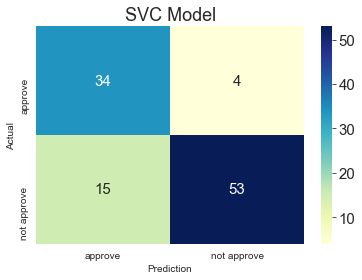

In [38]:
result(y_val,y_pred_svc,'SVC')

# 2.2 Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(solver='lbfgs')
pipe_logis = Pipeline([('preprocessor',preprocessor),
                      ('logreg',logistic_model)])

set_config(display='diagram')
pipe_logis

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['A2', 'A3', 'A8', 'A11',
                                                   'A15']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['A4', 'A5', 'A6', 'A7', 'A9',
                                                   'A10'])])),
                ('logreg', LogisticRegression())])

In [40]:
# Training Logistic Model
pipe_logis.fit(X_train,y_train)
y_pred_logis = pipe_logis.predict(X_val)

              precision    recall  f1-score   support

     approve       0.77      0.87      0.81        38
 not approve       0.92      0.85      0.89        68

    accuracy                           0.86       106
   macro avg       0.84      0.86      0.85       106
weighted avg       0.87      0.86      0.86       106



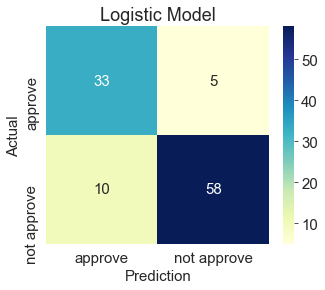

In [41]:
result(y_val,y_pred_logis,'Logistic')

It seems like Logistic Regression provides better results than SVC model. f1-score improves slightly from the previous model

In [42]:
y_pred_prob_logis = pipe_logis.predict_proba(X_val)[:,0] # approve
print(y_pred_prob_logis[:10])
print(y_pred_logis[:10])

[0.02433607 0.46614932 0.05382125 0.03667155 0.51566983 0.03803017
 0.82769188 0.74832626 0.02951166 0.11256211]
['not approve' 'not approve' 'not approve' 'not approve' 'approve'
 'not approve' 'approve' 'approve' 'not approve' 'not approve']


In [43]:
y_val_adj = np.where(y_val =='approve',1,0)
fpr,tpr,thresholds = roc_curve(y_val_adj,y_pred_prob_logis)

In [44]:
#finding optimal threshold, Youden’s J statistic
optimal_idx = np.argmax(tpr-fpr)
best_thresh = thresholds[optimal_idx]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.515670


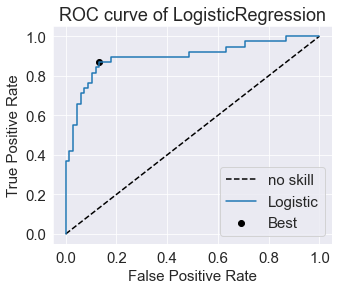

In [45]:
# plot roc curve
plt.figure()
plt.plot([0,1],[0,1],'k--',label='no skill')
plt.plot(fpr,tpr,label='Logistic')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of LogisticRegression')
plt.legend(loc='best')
plt.show()

In [46]:
y_pred_logis_newThreshold_roc = np.where(y_pred_prob_logis > best_thresh,'approve','not approve')

              precision    recall  f1-score   support

     approve       0.78      0.84      0.81        38
 not approve       0.91      0.87      0.89        68

    accuracy                           0.86       106
   macro avg       0.84      0.85      0.85       106
weighted avg       0.86      0.86      0.86       106



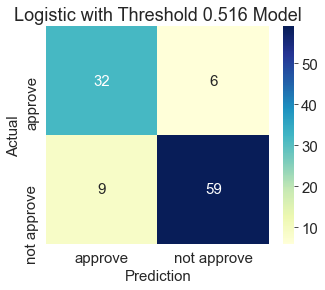

In [47]:
result(y_val, y_pred_logis_newThreshold_roc,'Logistic with Threshold {:.3f}'.format(best_thresh))

By setting new cut off point at best_thresh = 0.516, False Positive slightly decreases and this means financial institutions are less likely to approve credit to those who do not have ability to repay, less bad debt. However, we want to decrease False positive further, we need to increase threshold. let's say we change threshold from 0.516 to 0.67, the results is that we achieve lower false positive with a trade off of an increase in false negative. Less profit but safer for a ban

              precision    recall  f1-score   support

     approve       0.85      0.74      0.79        38
 not approve       0.86      0.93      0.89        68

    accuracy                           0.86       106
   macro avg       0.86      0.83      0.84       106
weighted avg       0.86      0.86      0.86       106



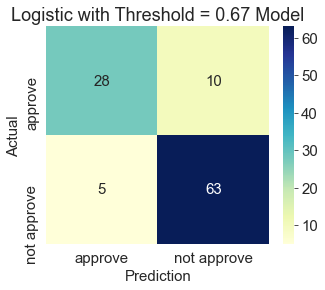

In [48]:
y_pred_logis_newThreshold_roc = np.where(y_pred_prob_logis > 0.67,'approve','not approve')
result(y_val,y_pred_logis_newThreshold_roc,'Logistic with Threshold = 0.67')

Now try precision and recall curve, this curve aims to improve precision which means that banks will be more likely to approve credit to those who have ability to pay back

In [49]:
from sklearn.metrics import precision_recall_curve
precision, recall,thresholds_prc = precision_recall_curve(y_val_adj,y_pred_prob_logis)
no_skill = len(y_val[y_val=='approve'])/len(y_val)

# If use F1-to find optimal thresholds 
# f1_score = (2*Precision*Recall)/(Precision + Recall)
fscore = 2*precision*recall/(precision+recall)
optimal_idx_f1Score = np.argmax(fscore)
best_thresh_prc = thresholds_prc[optimal_idx_f1Score]
print('Best Thresholds: {:.3f} and Best F1 Score : {:.3f}'.format(best_thresh_prc,fscore[optimal_idx_f1Score]))

Best Thresholds: 0.516 and Best F1 Score : 0.825


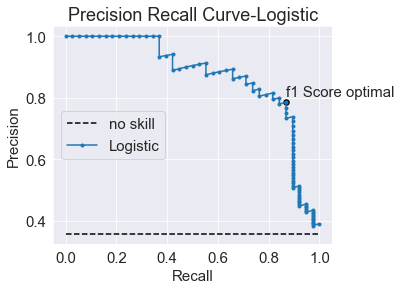

In [50]:
plt.plot([0,1],[no_skill,no_skill],'k--',label='no skill')
plt.plot(recall,precision,marker='.',label='Logistic')
plt.scatter(recall[optimal_idx_f1Score],precision[optimal_idx_f1Score],c='black',marker='o',s=30)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve-Logistic')
plt.text(recall[optimal_idx_f1Score],precision[optimal_idx_f1Score]+0.02,'f1 Score optimal')
plt.legend(loc='best')
plt.show()

In [51]:
prc = pd.DataFrame({'precision':precision[:-1],'recall':recall[:-1],'f1-score':fscore[:-1],'threshold':thresholds_prc})
prc[(prc['precision']>0.85)&(prc['f1-score']>0.72)].sort_values('precision',ascending=False)

,precision,recall,f1-score,threshold
69,0.892857,0.657895,0.757576,0.748326
70,0.888889,0.631579,0.738462,0.761385
66,0.870968,0.710526,0.782609,0.720277
67,0.866667,0.684211,0.764706,0.735594
68,0.862069,0.657895,0.746269,0.742874


Now select threshold from PRC table. Remember our goal is to increase precision so that a bank will be likely to approve credit to a right person.
I Select Threshold at 0.59

              precision    recall  f1-score   support

     approve       0.87      0.71      0.78        38
 not approve       0.85      0.94      0.90        68

    accuracy                           0.86       106
   macro avg       0.86      0.83      0.84       106
weighted avg       0.86      0.86      0.85       106



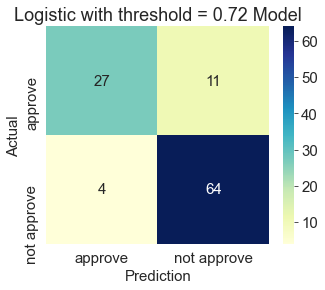

In [52]:
thresh = 0.72
y_pred_logis_newThreshold_prc = np.where(y_pred_prob_logis > thresh,'approve','not approve')
result(y_val,y_pred_logis_newThreshold_prc,'Logistic with threshold = 0.72')

Now the best model that we achieve so farr is Logistic Regression with threshold at 0.72. At this threshold, it make the bank safest from approve bad credit

# 2.3 KNN

In [54]:
KNN = KNeighborsClassifier()
pipe_KNN = Pipeline([('preprocessor',preprocessor),
                      ('knn',KNN)])

set_config(display='diagram')
pipe_KNN

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['A2', 'A3', 'A8', 'A11',
                                                   'A15']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['A4', 'A5', 'A6', 'A7', 'A9',
                                                   'A10'])])),
                ('knn', KNeighborsClassifier())])

In [56]:
# Tuining KNN
leaf_size = list(range(1,50))
n_neighbors = list(range(1,20))
p = [1,2]
param_grid = {'knn__leaf_size':leaf_size, 'knn__n_neighbors':n_neighbors, 'knn__p':p}

f1 = make_scorer(f1_score, pos_label="approve")
pipe_KNN = GridSearchCV(pipe_KNN,param_grid,f1)

In [58]:
best_model_knn = pipe_KNN.fit(X_train,y_train)

In [63]:
print(best_model_knn.best_params_)
print(best_model_knn.best_score_)

{'knn__leaf_size': 1, 'knn__n_neighbors': 17, 'knn__p': 1}
0.8891036414565825


In [64]:
y_pred_KNN = best_model_knn.predict(X_val)

              precision    recall  f1-score   support

     approve       0.83      0.76      0.79        38
 not approve       0.87      0.91      0.89        68

    accuracy                           0.86       106
   macro avg       0.85      0.84      0.84       106
weighted avg       0.86      0.86      0.86       106



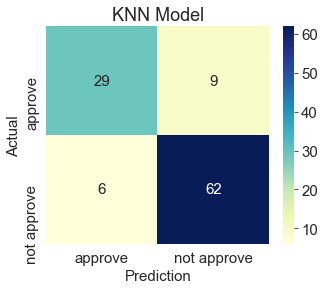

In [65]:
result(y_val,y_pred_KNN,'KNN')

In [68]:
df_performance = pd.DataFrame({'SVC':y_pred_svc,'Logreg':y_pred_logis,
                               'Logreg_Thresh067_roc':y_pred_logis_newThreshold_roc,
                               'Logreg_Thresh072_prc':y_pred_logis_newThreshold_prc,
                               'KNN':y_pred_KNN,
                               'Y_true':y_val})
df_performance.head(5)

,SVC,Logreg,Logreg_Thresh067_roc,Logreg_Thresh072_prc,KNN,Y_true
467,not approve,not approve,not approve,not approve,not approve,not approve
503,approve,not approve,not approve,not approve,approve,not approve
331,not approve,not approve,not approve,not approve,not approve,not approve
314,not approve,not approve,not approve,not approve,not approve,not approve
439,approve,approve,not approve,not approve,approve,approve


Now we have 3 models (SVC, LR with Threshold = 0.72, KNN), we will adopt these three models to predict unseen data which are X_test and evaluate their performance

# 3. Adopt models and predict unseen data

In [81]:
test_data = pd.read_csv('test_data_creditApproval.csv')
test_data = test_data[features_selected]
test_data.head()

,target,A2,A3,A8,A11,A15,A4,A5,A6,A7,A9,A10
0,approve,21.83,11.000,0.290,6,0,u,g,x,v,t,t
1,approve,23.50,9.000,8.500,5,0,u,g,q,v,t,t
2,approve,21.92,0.540,0.040,1,59,y,p,x,v,t,t
3,approve,39.33,5.875,10.000,14,0,u,g,cc,h,t,t
4,approve,38.67,0.210,0.085,0,0,u,g,k,v,t,f


In [82]:
X_test = test_data.drop('target',axis=1)
y_test = test_data['target']

In [122]:
# SVC
y_pred_test_SVC = best_model_svc.predict(X_test)

# LR
y_pred_test_LR = pipe_logis.predict_proba(X_test)[:,0]
thresh = 0.72
y_pred_test_LR = np.where(y_pred_test_LR > thresh,'approve','not approve')

# KNN
y_pred_test_KNN = best_model_knn.predict(X_test)

Test with Unseen Data
SVC Model
              precision    recall  f1-score   support

     approve       0.81      0.93      0.86        67
 not approve       0.91      0.78      0.84        67

    accuracy                           0.85       134
   macro avg       0.86      0.85      0.85       134
weighted avg       0.86      0.85      0.85       134



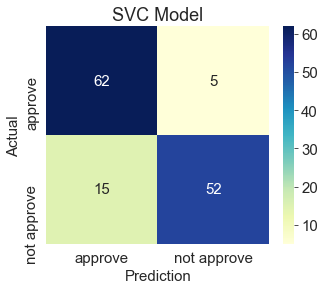

---------
LR Model
              precision    recall  f1-score   support

     approve       0.94      0.72      0.81        67
 not approve       0.77      0.96      0.85        67

    accuracy                           0.84       134
   macro avg       0.86      0.84      0.83       134
weighted avg       0.86      0.84      0.83       134



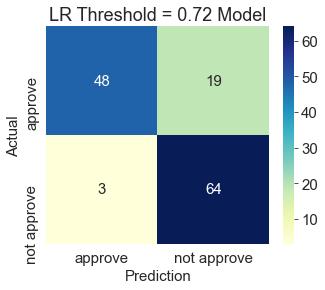

---------
KNN Model
              precision    recall  f1-score   support

     approve       0.90      0.78      0.83        67
 not approve       0.80      0.91      0.85        67

    accuracy                           0.84       134
   macro avg       0.85      0.84      0.84       134
weighted avg       0.85      0.84      0.84       134



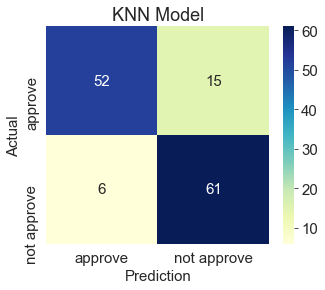

---------


In [123]:
print('Test with Unseen Data')
print('SVC Model')
result(y_test,y_pred_test_SVC,'SVC')
print('---------')
print('LR Model')
result(y_test,y_pred_test_LR,'LR Threshold = {}'.format(thresh))
print('---------')
print('KNN Model')
result(y_test,y_pred_test_KNN,'KNN')
print('---------')

# Conclusion
- The prominent model is Logistic Regression with threshold = 0.72 because it provides lowest False Positive meaning that it is quite difficult for customers to get credit from the model and the bank is safe lending money to those who cannot repay. However, by setting threshold at 0.72 instead of 0.5, there is a cost which is lower profit. In my opinion, this is acceptable because the first key success factor in lending business is risk management. For example, if a bank lend money to a person at amount $100 and such loan turn into bad debt, the bank lose all that money. In contrast, if the bank lend money to another person at the same amount, the bank will earn profit only around 5% (assumed). Therefore, the bank need to have 20 good credits to recover just one bad debt.
- In conclusion, I place an importance on providing credit to a right person who can repay not the person who can repay but does not get credit. For those customers who did not get approved by the model, I would suggest the bank to use human power to contact those customers to determine carefully if he/she should get credit approved.